<a href="https://colab.research.google.com/github/devangi2000/Natural_Language_Processing/blob/master/Shakespeare_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import keras

In [ ]:

!pip install np_utils


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

--2020-07-29 18:36:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-29 18:36:53 (134 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)

word_index = tokenizer.word_index

word_index

{'and': 1,
 'the': 2,
 'to': 3,
 'of': 4,
 'my': 5,
 'i': 6,
 'in': 7,
 'that': 8,
 'thy': 9,
 'thou': 10,
 'with': 11,
 'for': 12,
 'is': 13,
 'love': 14,
 'not': 15,
 'but': 16,
 'a': 17,
 'me': 18,
 'thee': 19,
 'so': 20,
 'be': 21,
 'as': 22,
 'all': 23,
 'you': 24,
 'his': 25,
 'which': 26,
 'when': 27,
 'it': 28,
 'this': 29,
 'by': 30,
 'your': 31,
 'doth': 32,
 'do': 33,
 'from': 34,
 'on': 35,
 'or': 36,
 'no': 37,
 'then': 38,
 'have': 39,
 'what': 40,
 'are': 41,
 'if': 42,
 'more': 43,
 'mine': 44,
 'their': 45,
 'shall': 46,
 'sweet': 47,
 'time': 48,
 'will': 49,
 'they': 50,
 'beauty': 51,
 'nor': 52,
 'eyes': 53,
 'art': 54,
 'her': 55,
 'heart': 56,
 'yet': 57,
 'o': 58,
 'than': 59,
 'can': 60,
 'should': 61,
 'thine': 62,
 'now': 63,
 'where': 64,
 'make': 65,
 'one': 66,
 'hath': 67,
 'he': 68,
 'fair': 69,
 'still': 70,
 'how': 71,
 'eye': 72,
 'him': 73,
 'like': 74,
 'true': 75,
 'see': 76,
 'am': 77,
 'she': 78,
 'those': 79,
 'though': 80,
 'being': 81,
 'some'

In [ ]:
total_words = len(word_index) + 1

input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  print(token_list)

[34, 417, 877, 166, 213, 517]
[8, 878, 134, 351, 102, 156, 199]
[16, 22, 2, 879, 61, 30, 48, 634]
[25, 311, 635, 102, 200, 25, 278]
[16, 10, 880, 3, 62, 85, 214, 53]
[1372, 9, 1373, 636, 11, 122, 1374, 1375]
[201, 17, 1376, 64, 518, 202]
[118, 9, 1377, 3, 9, 47, 122, 135, 279]
[10, 8, 54, 63, 2, 418, 312, 419]
[1, 352, 1378, 3, 2, 1379, 420]
[215, 62, 85, 881, 1380, 9, 882]
[1, 311, 883, 884, 313, 7, 1381]
[257, 2, 94, 36, 353, 29, 1382, 21]
[3, 637, 2, 418, 354, 30, 2, 638, 1, 19]
[27, 1383, 885, 46, 1384, 9, 280]
[1, 1385, 281, 1386, 7, 9, 134, 1387]
[9, 1388, 179, 1389, 20, 1390, 35, 63]
[49, 21, 17, 886, 639, 4, 887, 126, 888]
[38, 81, 1391, 64, 23, 9, 51, 202]
[64, 23, 2, 258, 4, 9, 889, 145]
[3, 95, 215, 62, 85, 281, 1392, 53]
[86, 146, 23, 1393, 236, 1, 1394, 96]
[71, 136, 43, 96, 1395, 9, 134, 186]
[42, 10, 1396, 640, 890, 69, 282, 4, 44]
[46, 519, 5, 520, 1, 65, 5, 112, 314, 147]
[1397, 25, 51, 30, 1398, 62]
[29, 86, 3, 21, 98, 127, 27, 10, 54, 112]
[1, 76, 9, 283, 1399, 27, 1

In [ ]:
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

input_sequences

[[34, 417],
 [34, 417, 877],
 [34, 417, 877, 166],
 [34, 417, 877, 166, 213],
 [34, 417, 877, 166, 213, 517],
 [8, 878],
 [8, 878, 134],
 [8, 878, 134, 351],
 [8, 878, 134, 351, 102],
 [8, 878, 134, 351, 102, 156],
 [8, 878, 134, 351, 102, 156, 199],
 [16, 22],
 [16, 22, 2],
 [16, 22, 2, 879],
 [16, 22, 2, 879, 61],
 [16, 22, 2, 879, 61, 30],
 [16, 22, 2, 879, 61, 30, 48],
 [16, 22, 2, 879, 61, 30, 48, 634],
 [25, 311],
 [25, 311, 635],
 [25, 311, 635, 102],
 [25, 311, 635, 102, 200],
 [25, 311, 635, 102, 200, 25],
 [25, 311, 635, 102, 200, 25, 278],
 [16, 10],
 [16, 10, 880],
 [16, 10, 880, 3],
 [16, 10, 880, 3, 62],
 [16, 10, 880, 3, 62, 85],
 [16, 10, 880, 3, 62, 85, 214],
 [16, 10, 880, 3, 62, 85, 214, 53],
 [1372, 9],
 [1372, 9, 1373],
 [1372, 9, 1373, 636],
 [1372, 9, 1373, 636, 11],
 [1372, 9, 1373, 636, 11, 122],
 [1372, 9, 1373, 636, 11, 122, 1374],
 [1372, 9, 1373, 636, 11, 122, 1374, 1375],
 [201, 17],
 [201, 17, 1376],
 [201, 17, 1376, 64],
 [201, 17, 1376, 64, 518],
 [201,

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences

array([[   0,    0,    0, ...,    0,   34,  417],
       [   0,    0,    0, ...,   34,  417,  877],
       [   0,    0,    0, ...,  417,  877,  166],
       ...,
       [   0,    0,    0, ...,  493,  493, 3210],
       [   0,    0,    0, ...,  493, 3210,   15],
       [   0,    0,    0, ..., 3210,   15,   14]], dtype=int32)

In [ ]:
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]

In [ ]:
label = keras.utils.to_categorical(label, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2,activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(predictors, label, epochs=100,verbose=1)

Epoch 1/100
484/484 [==============================] - 6s 12ms/step - loss: 6.9045 - accuracy: 0.0215
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4991 - accuracy: 0.0231
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.3950 - accuracy: 0.0250
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2798 - accuracy: 0.0285
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1942 - accuracy: 0.0340
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1239 - accuracy: 0.0376
Epoch 7/100
484/484 [==============================] - 6s 12ms/step - loss: 6.0560 - accuracy: 0.0395
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9826 - accuracy: 0.0442
Epoch 9/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8912 - accuracy: 0.0497
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.784

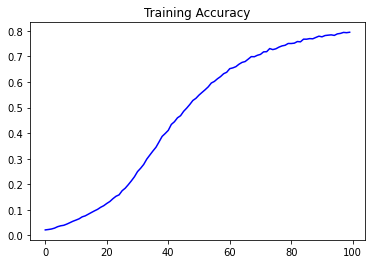

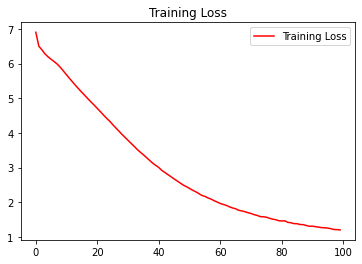

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']


epochs= range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt. show()

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')
  predicted = model.predict_classes(token_list, verbose=0)
  output_word = ''

  for word, index in word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text+= ' ' + output_word

print(seed_text)

Help me Obi Wan Kenobi, you're my only hope from every glory woe 'will ' thee to me call you lose your rhyme respect decay forgot doth none grow you deem'd hell life twain tender'd me strange kind of kings care you end me store me told him done till thine love me thee thee now never ear die die young thee great foes feast me thee none 'will ' tend stay be him me me abused me abused thee swear hast me me fair art good friend alone will be his 'will' to invent care in first chide outworn you bring thee ill bright ' good ' be
